Jorge Medina - 12.6.21

Dataset link - https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists <br>

Context and Content

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Edit:( Company wants to know which of these candidates really want to work for the company after training or look for a new employment. The decision would help reduce the cost and time as well as the quality of training or planning of the courses and categorization of candidates.) Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

    The dataset is imbalanced.
    Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
    Missing imputation can be a part of your pipeline as well.



Features

    enrollee_id : Unique ID for candidate

    city: City code

    city_ development _index : Developement index of the city (scaled)

    gender: Gender of candidate

    relevent_experience: Relevant experience of candidate

    enrolled_university: Type of University course enrolled if any

    education_level: Education level of candidate

    major_discipline :Education major discipline of candidate

    experience: Candidate total experience in years

    company_size: No of employees in current employer's company

    company_type : Type of current employer

    lastnewjob: Difference in years between previous job and current job

    training_hours: training hours completed

    target: 0 – Not looking for job change, 1 – Looking for a job change


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import the training dataset
hr=pd.read_csv('data/aug_train.csv')
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
hr.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Fix Null Values<br>
This section goes through steps to get rid of the null values in the dataset. Most of the steps get repeated for all of the columns that have null values. I was able fill na values with 'Other' or the most reoccuring values. 

In [6]:
#display the amount of null vallues in the each column
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Fixing Gender Null Values <br>
gender: Gender of candidate

In [7]:
#get the count of unique values in the dataset
hr.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

There are 4508 null values in the gender column. We will turn them into the 'other' category.

In [8]:
#display the rows that have na values in the gender column
hr[hr['gender'].isna()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,11398,city_103,0.920,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,never,15,0.0
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0
19145,155,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0


In [9]:
#fill na values in the gender column
#replace the na values with 'other'
hr.gender.fillna('Other', inplace=True)


In [10]:
#display the count of unique values
hr.gender.value_counts()

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

In [11]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Fix enrolled_university null values <br>
enrolled_university: Type of University course enrolled if any

In [12]:
hr[hr['enrolled_university'].isna()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3,33241,city_115,0.789,Other,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
13,5826,city_21,0.624,Male,No relevent experience,NaN,NaN,NaN,2,NaN,NaN,never,24,0.0
62,24690,city_41,0.827,Other,Has relevent experience,NaN,Masters,STEM,13,<10,NaN,1,15,0.0
69,4830,city_90,0.698,Other,No relevent experience,NaN,NaN,NaN,2,NaN,Pvt Ltd,never,228,1.0
171,12384,city_70,0.698,Other,Has relevent experience,NaN,NaN,NaN,>20,NaN,NaN,>4,33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18958,31115,city_21,0.624,Male,Has relevent experience,NaN,Graduate,STEM,7,10/49,Funded Startup,1,152,0.0
18965,26499,city_160,0.920,Male,Has relevent experience,NaN,Graduate,STEM,>20,NaN,NaN,>4,50,1.0
19014,6994,city_16,0.910,Other,Has relevent experience,NaN,Masters,STEM,8,NaN,NaN,3,47,1.0
19109,21334,city_21,0.624,Other,Has relevent experience,NaN,Graduate,STEM,4,10/49,Pvt Ltd,never,89,0.0


In [13]:
#display the unique values for enrolled_university
hr.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

We will put the null values for enrolled_university under the no_enrollment

In [14]:
#fill na values in enrolled_university under no_enrollment
hr.enrolled_university.fillna('no_enrollment',inplace=True)

In [15]:
hr.enrolled_university.value_counts()

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [16]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Fix education_level null values <br>
education_level: Education level of candidate

In [17]:
hr.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

There are 460 values that are null under this category. Since High School is a standard education, we will replace the mmissing values with High School

In [18]:
#replace the null values with High School
hr.education_level.fillna('High School',inplace=True)

In [19]:
hr.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2477
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [20]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Major_discipline null values <br>
major_discipline :Education major discipline of candidate

In [21]:
hr.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

We will fill null values with Other

In [22]:
#fill na values with 'Other'
hr.major_discipline.fillna('Other',inplace=True)

In [23]:
hr.major_discipline.value_counts()

STEM               14492
Other               3194
Humanities           669
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [24]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Fill experience null values<br>
experience: Candidate total experience in years

In [25]:
hr.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

There are only 65 null values for this column, replacing them with <1 should be fine. Maybe some people did not fill it in because they have little to none experience.

In [26]:
#fill na values with <1 experience
hr.experience.fillna('<1', inplace=True)

In [27]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### company_size null values <br>
company_size: No of employees in current employer's company

In [28]:
#display the rows that have missing data in the company size
hr.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

Since these values are not integers, we will not be able to get the mean of the column and replace the null values with it. There are 5938 null values in this column so it is not a small number to be able to drop them all.
Lets look at the mode for these values by looking at the value counts.

In [29]:
hr.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

50-99 is the most common

In [30]:
#replace the null values with 50-99
hr['company_size'].fillna('50-99',inplace=True)

hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### company_type null values <br>
company_type : Type of current employer

In [31]:
#display the value counts for companytype
hr.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

Lets replace all of the null values with 'Other'.

In [32]:
#fill na values with 'Other'
hr.company_type.fillna('Other',inplace=True)

In [33]:
hr.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
company_size                0
company_type                0
last_new_job              423
training_hours              0
target                      0
dtype: int64

## last_new_job null values<br>
lastnewjob: Difference in years between previous job and current job

In [34]:
hr.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

Lets fill na values with 1

In [35]:
hr.last_new_job.fillna(1,inplace=True)

hr.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

All missing values have been filled in by looking at the type of data it is and deciding wether to put it in a category or get the mode of the column. Lets continue with some exploratory analysis. <br>
Future Task?<br>
Try to implement ML to fill in missing values??

# EDA

In [36]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,50-99,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<AxesSubplot:>

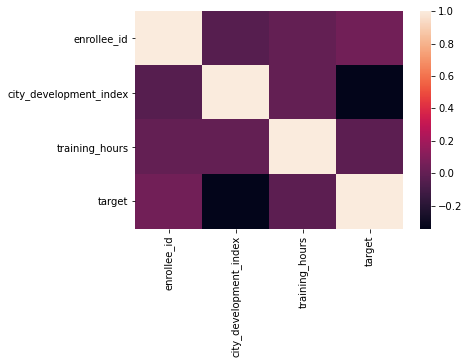

In [37]:
#get the correlation for the data frame
hr_corr = hr.corr()

#Use a heatmap to display correlatin
sns.heatmap(hr_corr)

There seems to be little to no correlation between the features above. Lets try to visualize some other columns in the dataframe.

In [38]:
sns_colors = ['#FFAF87','#FF8E72','#ED6A5E','#4CE0B3','#377771','#DF57BC']
sns.set_palette(sns.color_palette(sns_colors))

Text(0, 0.5, '')

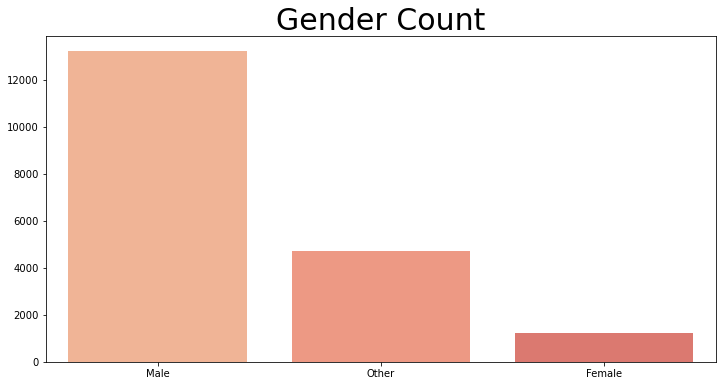

In [39]:
#set plot params
plt.figure(figsize=(12,6))
plt.title('Gender Count',fontdict={'fontsize':30})

#plot the gender
sns.countplot(data=hr, x = 'gender',palette=sns_colors)

#plot label parms
plt.xlabel('')
plt.ylabel('')

In [40]:
#give a count of the genders
hr['gender'].value_counts()

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

This dataset seems to be male dominant.

Text(0, 0.5, '')

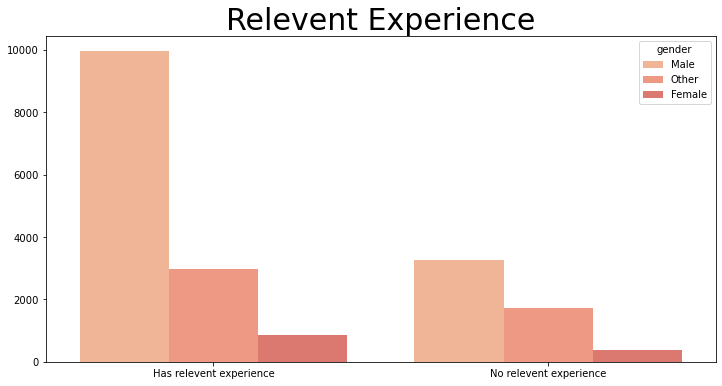

In [41]:
#set plot params
plt.figure(figsize=(12,6))
plt.title('Relevent Experience',fontdict={'fontsize':30})

sns.countplot(data=hr, x='relevent_experience',hue='gender')


#plot label parms
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

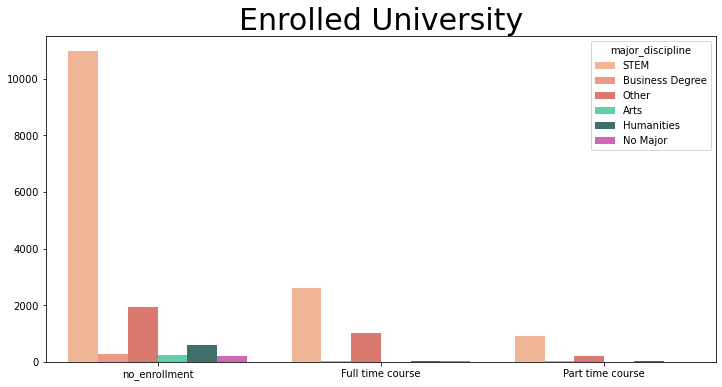

In [42]:
#set plot params
plt.figure(figsize=(12,6))
plt.title('Enrolled University',fontdict={'fontsize':30})

sns.countplot(data=hr, x='enrolled_university',hue='major_discipline')


#plot label parms
plt.xlabel('')
plt.ylabel('')

Looks like most of the candidates majored in  a STEM field and are currently not enrolled in a university. <br>
Would these people be more likely to keep the job?

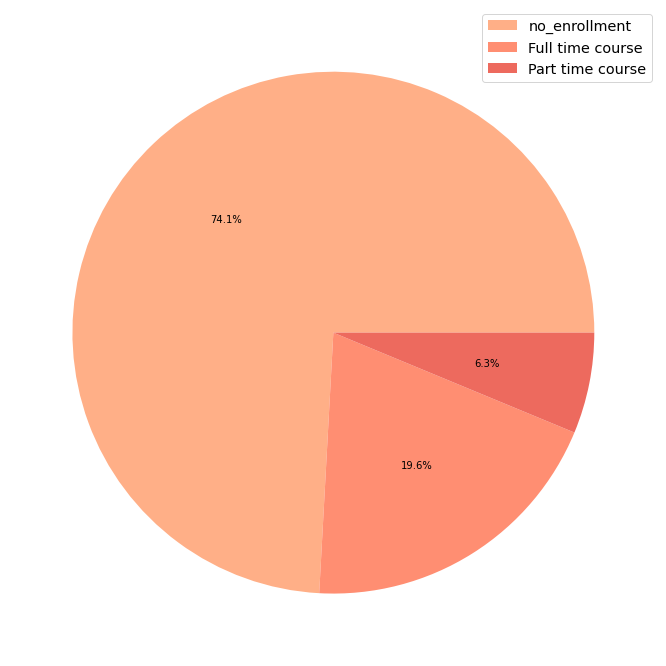

In [43]:
#hold the count of values in enrolled_university
enr_univ = hr['enrolled_university'].value_counts()
#create the labels
enr_univ_lbl = hr['enrolled_university'].unique()

#pie chart parms
plt.figure(figsize=(12,12))

plt.pie(enr_univ,autopct ='%1.1f%%')
plt.legend(enr_univ_lbl,fontsize='x-large')


plt.show()

Text(0.5, 0, '')

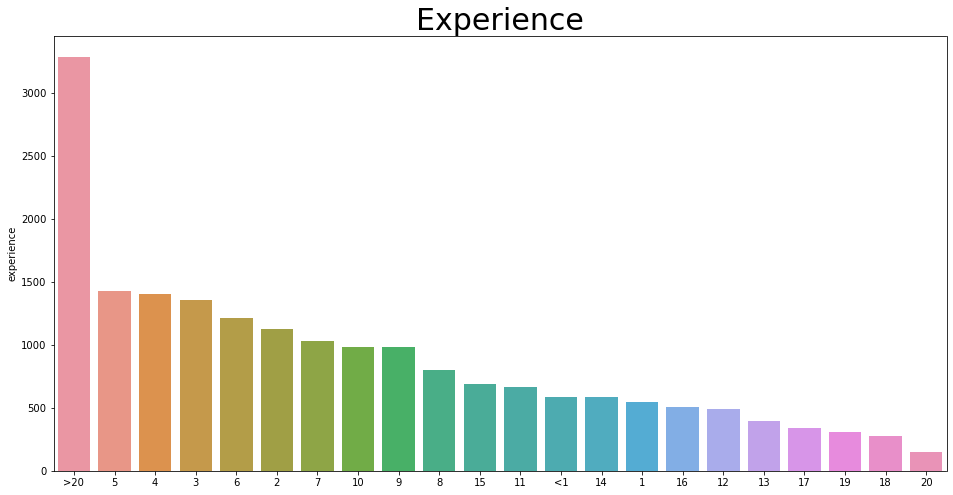

In [44]:
#major_discipline vs experience
sort = pd.DataFrame(data=hr['experience'].value_counts().reset_index())

plt.figure(figsize=(16,8))
plt.title('Experience',fontdict={'fontsize':30})

sns.barplot(data=sort,x='index',y='experience')

plt.xlabel('')

More than 3000 entries have more than 20 years of experience.

# Feature Engineering

In [45]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [351]:
hr1 = hr.drop(labels = ['enrollee_id','city_development_index','target'],axis = 1).copy()

In [352]:

hr1 = pd.get_dummies(hr1)

hr1

,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,...,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,36,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,47,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,83,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,52,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,42,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
19154,52,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
19155,44,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
19156,97,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [353]:
X = hr1

y= hr.target

In [354]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 72)

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression()
scale = StandardScaler()

In [356]:
S_X_train = scale.fit_transform(X_train)
S_X_test = scale.transform(X_test)

In [357]:
log_reg.fit(S_X_train,y_train)

LogisticRegression()

In [358]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [359]:
ypred= log_reg.predict(S_X_test)

In [360]:
accuracy_score(ypred,y_test)

0.7813152400835073

In [361]:
len(X_test)

3832

In [362]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      2897
         1.0       0.59      0.35      0.44       935

    accuracy                           0.78      3832
   macro avg       0.70      0.63      0.65      3832
weighted avg       0.76      0.78      0.76      3832



In [363]:
confusion_matrix(y_test,ypred)

array([[2669,  228],
       [ 610,  325]], dtype=int64)

# KNN

In [389]:
from sklearn.neighbors import KNeighborsClassifier

kn_mod_8 = KNeighborsClassifier(n_neighbors=8)

In [390]:
kn_mod_8.fit(S_X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [391]:
kn_pred = kn_mod_8.predict(S_X_test)

In [392]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86      2897
         1.0       0.57      0.31      0.40       935

    accuracy                           0.78      3832
   macro avg       0.69      0.62      0.63      3832
weighted avg       0.75      0.78      0.75      3832



In [393]:
confusion_matrix(y_test,kn_pred)

array([[2680,  217],
       [ 644,  291]], dtype=int64)

2708 True Negative<br>
189    False Positive<br>
765  False Negative<br>
170   True Positive

In [369]:
error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i,n_jobs=-1)
    knn.fit(S_X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

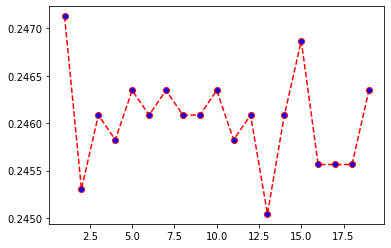

In [370]:
plt.plot(range(1,20), error, color ='red', linestyle='dashed', marker = 'o', markerfacecolor = 'blue')

Looks like there is less error when n_neighbors = 10

In [398]:
kn_mod_4 = KNeighborsClassifier(n_neighbors=13)

kn_mod_4.fit(S_X_train,y_train)

kn_pred_4 = kn_mod_4.predict(S_X_test)



In [399]:
print(classification_report(kn_pred_4,y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86      3225
         1.0       0.37      0.57      0.45       607

    accuracy                           0.78      3832
   macro avg       0.64      0.69      0.66      3832
weighted avg       0.82      0.78      0.80      3832



In [400]:
kn10_cf = confusion_matrix(kn_pred_4,y_test)
kn10_cf

array([[2637,  588],
       [ 260,  347]], dtype=int64)

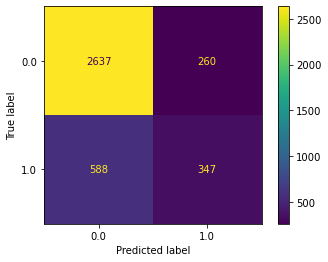

In [401]:
plot_confusion_matrix(kn_mod_4,S_X_test,y_test)

In [402]:
y_test.value_counts()

0.0    2897
1.0     935
Name: target, dtype: int64

2897 True Negative (0)<br> 935 True Positive 1

# Understanding the confussion matrix

### This data set is to predict wether a candidate would stay in the company or look for a job change after going through commpany training. A 0 means the candidate would not look for a job change and a 1 means the candidate will look.<br><br>

Out of 3832 entries;<br> 
2637 were classified as True Negative. The sample has 2897 TN but only 2637 got classified correct. The model predicted these candidates will NOT look for a job after training, the company would benefit from their training<br><br>

347 were classified as True Positive. The sample has 935 TP but only 347 got classified correct. The model predicted that these 347 candidates will look for a job change after training, the company benefits from the correct classification of these candidates.<br><br>

588 were classified as False Negative. The model predicted that 588 candidates would not look for a job change but infact they would, resulting in a type 2 error.<br> If the 588 candidates went through training, they would finish the training and look for a job shortly after, costing the company time and traing resources. <br><br>

260 were classified as False Positive. The model predicted that 260 candidates will look for a job change after training but they  would in fact stay with the company, resulting in a type 1 error.<br>If the company were to run the candidates attributes through the model, they would not get chosen for training because of the misclassification, the company does not lose or benefit from this result.<br>



# Random thoughts about the confusion matrix
Problem:<br>
The company does not want to train the candidates that would end up leaving the company after training.
<br><br>
Thoughts:<br>
Lowering the False Negative would help. If the model predicts that a candidate will not leave after the training but in fact they will leave, the company loses resources.<br>
The value for False Positive could be bigger if needed. These candidates would not get chosen but the company does not lose any resources.

# Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
rf_model= RandomForestClassifier(n_estimators=12, max_features='auto',random_state=101)

# train the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=12, random_state=101)

In [282]:
##get the predictions
rf_pred = rf_model.predict(X_test)

In [283]:
confusion_matrix(y_test,rf_pred)

array([[13536,   831],
       [ 4431,   340]], dtype=int64)

In [190]:
confusion_matrix(y_test,rf_pred)

array([[13491,   876],
       [ 4441,   330]], dtype=int64)